In [16]:
import torch
from torch.autograd import Variable

from torch import optim
import cv2
import numpy as np

from matplotlib.pyplot import imshow as im
from sdo.io import sdo_read
from numpy import load

from sdo.metrics.ssim_metric import ssim, SSIM

## Trying the repo on standard image

In [18]:
img1 = Variable(torch.rand(1, 1, 256, 256))
img2 = Variable(torch.rand(1, 1, 256, 256))

if torch.cuda.is_available():
    img1 = img1.cuda()
    img2 = img2.cuda()

print(ssim(img1, img2))

ssim_loss = SSIM(window_size = 20)

print(ssim_loss(img1, img2))

tensor(0.0250, device='cuda:0')
tensor(0.0300, device='cuda:0')


In [19]:
npImg1 = cv2.imread("~/expanding-sdo-capabilities/src/sdo/pytorch-ssim/einstein.png")

img1 = torch.from_numpy(np.rollaxis(npImg1, 2)).float().unsqueeze(0)/255.0
img2 = torch.rand(img1.size())

if torch.cuda.is_available():
    img1 = img1.cuda()
    img2 = img2.cuda()


img1 = Variable( img1, requires_grad=False)
img2 = Variable( img2, requires_grad = True)

AttributeError: 'NoneType' object has no attribute 'ndim'

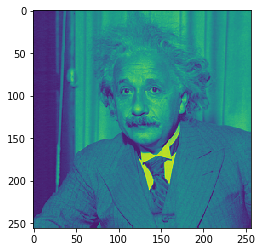

In [26]:
im(img1.cpu()[0][2])

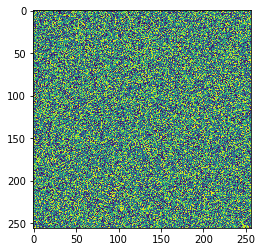

In [28]:
im(img2.detach().cpu()[0][2])

In [17]:
# Functional: pytorch_ssim.ssim(img1, img2, window_size = 11, size_average = True)
ssim_value = pytorch_ssim.ssim(img1, img2)#.data[0]
print("Initial ssim:", ssim_value)

# Module: pytorch_ssim.SSIM(window_size = 11, size_average = True)
ssim_loss = SSIM()

optimizer = optim.Adam([img2], lr=0.01)

while ssim_value < 0.95:
    optimizer.zero_grad()
    ssim_out = -ssim_loss(img1, img2)
    ssim_value = - ssim_out
    print(ssim_value)
    ssim_out.backward()
    optimizer.step()

Initial ssim: tensor(0.0259, device='cuda:0')
tensor(0.0259, device='cuda:0')


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Test on Sun images

In [2]:
subsample = 1
yr = 2015
month = 9
day = 12
hour = 0
minu = 24
channel = '0171'

DATA_FILENAME_TEMPLATE = \
    '{0:s}/{1:04d}/{2:02d}/{3:02d}/{4:s}{5:04d}{6:02d}{7:02d}_{8:02d}{9:02d}_{10:s}.npz'
file = DATA_FILENAME_TEMPLATE.format('/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML', 
                                     yr, month, day, 'AIA', yr, month, day, hour, minu,channel)
a = ((load(file))['x'])[::subsample, ::subsample]

In [3]:
img1 = torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0).cuda()

In [4]:
img2 = torch.rand(img1.size())

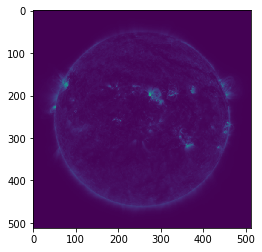

In [5]:
im(img1.cpu()[0][0])

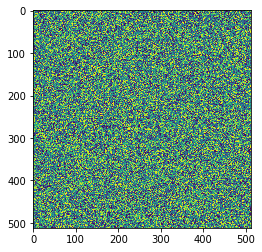

In [6]:
im(img2.cpu()[0][0])

In [78]:
img1 = img1.cuda()
img2 = img2.cuda()
img1 = Variable( img1, requires_grad=False)
img2 = Variable( img2, requires_grad = True)

# Functional: pytorch_ssim.ssim(img1, img2, window_size = 11, size_average = True)
ssim_value = pytorch_ssim.ssim(img1, img2)
print("Initial ssim:", ssim_value)

# Module: pytorch_ssim.SSIM(window_size = 11, size_average = True)
ssim_loss = pytorch_ssim.SSIM()

optimizer = optim.Adam([img2], lr=0.01)

while ssim_value < 0.95:
    optimizer.zero_grad()
    ssim_out = -ssim_loss(img1, img2)
    ssim_value = - ssim_out
    print(ssim_value)
    ssim_out.backward()
    optimizer.step()

Initial ssim: tensor(0.0031, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0039, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0047, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0055, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0063, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0071, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0079, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0087, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0095, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0103, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0111, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0119, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0126, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0134, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0141, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0149, device='cuda:0', grad_fn=<NegBackward>)
tensor(0.0156, device='cuda:0', grad_fn=<NegBackw

KeyboardInterrupt: 

## Compare images of the Sun at 1 day of difference

In [7]:
subsample = 1
yr = 2015
month = 9
day = 13
hour = 0
minu = 24
channel = '0171'

DATA_FILENAME_TEMPLATE = \
    '{0:s}/{1:04d}/{2:02d}/{3:02d}/{4:s}{5:04d}{6:02d}{7:02d}_{8:02d}{9:02d}_{10:s}.npz'
file = DATA_FILENAME_TEMPLATE.format('/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML', 
                                     yr, month, day, 'AIA', yr, month, day, hour, minu,channel)
b = ((load(file))['x'])[::subsample, ::subsample]

In [8]:
img3 = torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0).cuda()

Initial ssim: tensor(0.2963, device='cuda:0', grad_fn=<MeanBackward0>)
1 tensor(0.2963, device='cuda:0', grad_fn=<NegBackward>)
2 tensor(0.2982, device='cuda:0', grad_fn=<NegBackward>)
3 tensor(0.3002, device='cuda:0', grad_fn=<NegBackward>)
4 tensor(0.3022, device='cuda:0', grad_fn=<NegBackward>)
5 tensor(0.3041, device='cuda:0', grad_fn=<NegBackward>)
6 tensor(0.3061, device='cuda:0', grad_fn=<NegBackward>)
7 tensor(0.3081, device='cuda:0', grad_fn=<NegBackward>)
8 tensor(0.3100, device='cuda:0', grad_fn=<NegBackward>)
9 tensor(0.3119, device='cuda:0', grad_fn=<NegBackward>)
10 tensor(0.3139, device='cuda:0', grad_fn=<NegBackward>)
11 tensor(0.3158, device='cuda:0', grad_fn=<NegBackward>)
12 tensor(0.3177, device='cuda:0', grad_fn=<NegBackward>)
13 tensor(0.3196, device='cuda:0', grad_fn=<NegBackward>)
14 tensor(0.3214, device='cuda:0', grad_fn=<NegBackward>)
15 tensor(0.3232, device='cuda:0', grad_fn=<NegBackward>)
16 tensor(0.3251, device='cuda:0', grad_fn=<NegBackward>)
17 tensor(

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2000ff47db70> (for post_execute):


KeyboardInterrupt: 

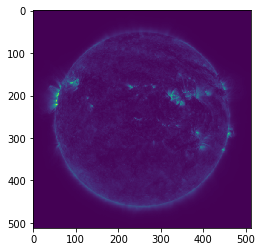

In [9]:
img1 = Variable( img1, requires_grad=False)
img3 = Variable( img3, requires_grad = True)

# Functional: pytorch_ssim.ssim(img1, img2, window_size = 11, size_average = True)
ssim_value = pytorch_ssim.ssim(img1, img3)
print("Initial ssim:", ssim_value)

# Module: pytorch_ssim.SSIM(window_size = 11, size_average = True)
ssim_loss = pytorch_ssim.SSIM()

optimizer = optim.Adam([img3], lr=0.01)

i=0
img1_cpu = img1.cpu()[0][0]
im(img1_cpu)
while ssim_value < 0.95:
    i += 1
    optimizer.zero_grad()
    ssim_out = -ssim_loss(img1, img3)
    ssim_value = - ssim_out
    print(i, ssim_value)
    ssim_out.backward()
    optimizer.step()
    if i%10==0:
        img3_cpu = img3.detach().cpu()[0][0]
        im(img3_cpu)

In [12]:
print(i, ssim_value)

8587 tensor(0.6488, device='cuda:0', grad_fn=<NegBackward>)


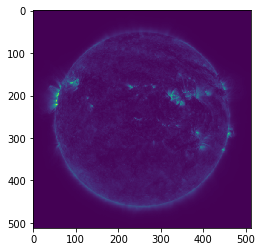

In [10]:
# reconstruncted img3 from img1
img3_cpu = img3.detach().cpu()[0][0]
im(img3_cpu)

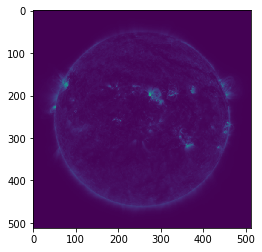

In [11]:
# image 1
img1_cpu = img1.cpu()[0][0]
im(img1_cpu)

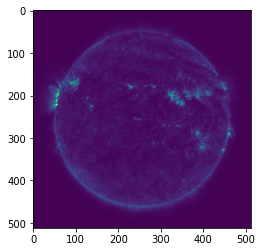

In [13]:
# original img3
im(b)